Saving Housing.csv to Housing (1).csv
RESULTS FOR PROBLEM 1A (Best Alpha: 0.1)
Final Validation Loss: 757587417934.863037
Final Training Loss: 771371481089.015259

MODEL COEFFICIENTS :
  Intercept (θ0) : 2248191.75267363
  area           : 4332341.37951607
  bedrooms       : 1172897.86882077
  bathrooms      : 3312991.63727958
  stories        : 1573877.25456812
  parking        : 1196099.33864731


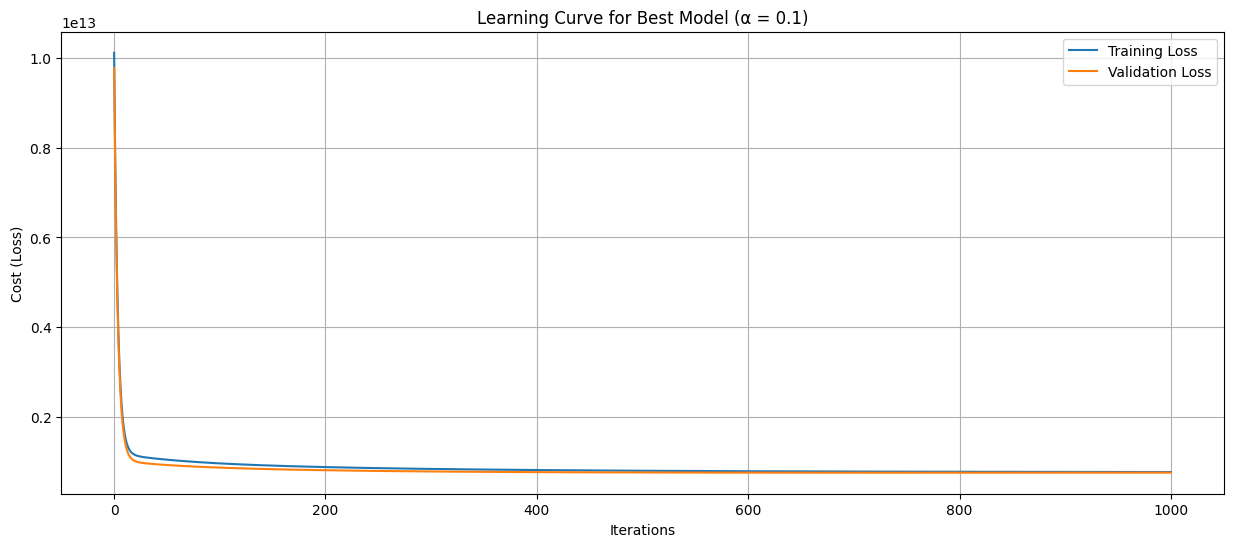

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()
data = pd.read_csv("Housing.csv")

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

X = data[features].to_numpy(dtype = float) ## selects only the specific columns relevant to problem 1
y = data['price'].to_numpy(dtype = float)

## Normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

m = len(y)
X_b = np.c_[np.ones((m,1)), X_normalized]## adding intercept term

X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size = 0.2, random_state = 14)
theta = np.zeros(X_train.shape[1])

def compute_cost(X,y, theta):
    m = len(y)
    errors = X.dot(theta) - y
    return (1.0/(2 * m)) * np.dot(errors, errors)

def gradient_descent(X_train, y_train, X_val, y_val, theta, alpha, iterations):
    m_train = len(y_train)
    J_hist_train = np.zeros(iterations)
    J_hist_val = np.zeros(iterations)

    for i in range(iterations):
        predictions = X_train.dot(theta)
        errors = predictions - y_train
        theta -= (alpha / m_train ) * (X_train.T.dot(errors))

        J_hist_train[i] = compute_cost(X_train, y_train, theta)
        J_hist_val[i] = compute_cost(X_val, y_val, theta)

    return theta, J_hist_train, J_hist_val

alphas = [0.1, 0.05, 0.02, 0.01 ]
iterations = 1001

best = None
per_alpha = []

for a in alphas:
  theta0 = np.zeros(X_train.shape[1])
  theta, J_hist_train, J_hist_val = gradient_descent(X_train, y_train, X_val, y_val, theta0, a, iterations)

  final_train_cost = J_hist_train[-1]
  final_val_cost = J_hist_val[-1]

  per_alpha.append((a, final_train_cost, theta, final_val_cost))

  if best is None or final_val_cost < best["final_val_cost"]:
    best = {"theta": theta, "alpha": a, "J_hist_train": J_hist_train, "final_train_cost": final_train_cost,
            "J_hist_val": J_hist_val, "final_val_cost": final_val_cost}

## Output results
print(f"RESULTS FOR PROBLEM 1A (Best Alpha: {best['alpha']})")
print(f"Final Validation Loss: {best['final_val_cost']:.6f}")
print(f"Final Training Loss: {best['final_train_cost']:.6f}")
print("\nMODEL COEFFICIENTS :")

# Prepare feature names for printing
parameter_names = ["Intercept (θ0)"] + features
best_theta = best['theta']

for name, theta_val in zip(parameter_names, best_theta):
    print(f"  {name:<15}: {theta_val:.8f}")

## Plot training and validation losses
plt.figure(figsize=(15, 6))
plt.plot(best['J_hist_train'], label='Training Loss')
plt.plot(best['J_hist_val'], label='Validation Loss')
plt.title(f'Learning Curve for Best Model (α = {best["alpha"]})')
plt.xlabel('Iterations')
plt.ylabel('Cost (Loss)')
plt.legend()
plt.grid(True)
plt.show()